In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "pima-data"

In [2]:
data<-read.csv("/kaggle/input/pima-data/pima_data.csv")

In [3]:
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,50,73,NA,146,28.84203,1.3921480,65,0
2,3,100,61,NA,111,24.59873,2.4811255,62,0
3,12,53,129,NA,102,31.11380,2.1580735,29,0
4,14,162,76,12,NA,27.54457,0.3336805,69,1
5,10,81,87,27,NA,21.61692,1.7952928,53,1
6,7,83,125,7,NA,20.56483,0.9293910,56,1


In [15]:
  mean_Pregnancies<-mean(data$Pregnancies[data$Pregnancies !=0],na.rm=TRUE)
    data[is.na(data$Pregnancies), "Pregnancies"] <- mean(data$Pregnancies, na.rm = TRUE)
  mean_SkinThickness<-mean(data$SkinThickness[data$SkinThickness !=0],na.rm=TRUE)
    data[is.na(data$SkinThickness), "SkinThickness"] <- mean(data$SkinThickness, na.rm = TRUE)
 mean_Glucose<-mean(data$Glucose[data$Glucose !=0],na.rm=TRUE)
    data[is.na(data$Glucose), "Glucose"] <- mean(data$Glucose, na.rm = TRUE)
 mean_Insulin<-mean(data$Insulin[data$Insulin !=0],na.rm=TRUE)
    data[is.na(data$Insulin), "Insulin"] <- mean(data$Insulin, na.rm = TRUE)


In [16]:
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,50,73,27.23387,146.0000,28.84203,1.3921480,65,0
2,3,100,61,27.23387,111.0000,24.59873,2.4811255,62,0
3,12,53,129,27.23387,102.0000,31.11380,2.1580735,29,0
4,14,162,76,12.00000,154.7579,27.54457,0.3336805,69,1
5,10,81,87,27.00000,154.7579,21.61692,1.7952928,53,1
6,7,83,125,7.00000,154.7579,20.56483,0.9293910,56,1


In [39]:
data$Pregnancies <-round(data$Pregnancies,2)
data$SkinThickness<-round(data$SkinThickness,2)
data$Insulin<-round(data$Insulin,2)
data$BMI<-round(data$BMI,2)


In [40]:
# Initialize an empty list or data frame to store means
rounded_values <- list()

# Loop through numeric columns and calculate mean
# Example code assuming col is a character variable
for (col in numeric_columns) {
  print(paste0("data$",col))
}



[1] "data$Pregnancies"
[1] "data$Glucose"
[1] "data$BloodPressure"
[1] "data$SkinThickness"
[1] "data$Insulin"
[1] "data$BMI"
[1] "data$DiabetesPedigreeFunction"
[1] "data$Age"
[1] "data$Outcome"


In [11]:
str(data)

'data.frame':	1000 obs. of  9 variables:
 $ Pregnancies             : int  6 3 12 14 10 7 12 4 6 9 ...
 $ Glucose                 : int  50 100 53 162 81 83 141 144 121 88 ...
 $ BloodPressure           : int  73 61 129 76 87 125 94 64 124 99 ...
 $ SkinThickness           : num  27.2 27.2 27.2 12 27 ...
 $ Insulin                 : int  146 111 102 NA NA NA NA 282 39 NA ...
 $ BMI                     : num  28.8 24.6 31.1 27.5 21.6 ...
 $ DiabetesPedigreeFunction: num  1.392 2.481 2.158 0.334 1.795 ...
 $ Age                     : int  65 62 29 69 53 56 56 38 29 77 ...
 $ Outcome                 : int  0 0 0 1 1 1 1 0 0 1 ...


                           Pregnancies      Glucose BloodPressure SkinThickness
Pregnancies               1.0000000000 -0.023231561  -0.050305247 -3.012200e-02
Glucose                  -0.0232315613  1.000000000   0.026634500 -8.553269e-02
BloodPressure            -0.0503052467  0.026634500   1.000000000  5.100007e-02
SkinThickness            -0.0301220027 -0.085532688   0.051000074  1.000000e+00
Insulin                  -0.0358740597  0.002008695  -0.005936434  3.564410e-09
BMI                       0.0223496753 -0.016733100  -0.046707749 -1.123604e-02
DiabetesPedigreeFunction -0.0141245878 -0.033064005   0.015850540  5.549703e-02
Age                       0.0239435972 -0.026429173  -0.047543861 -1.875654e-02
Outcome                   0.0005410511 -0.003824387   0.008898497  2.091293e-04
                               Insulin         BMI DiabetesPedigreeFunction
Pregnancies              -3.587406e-02  0.02234968              -0.01412459
Glucose                   2.008695e-03 -0.016733

corrplot 0.92 loaded



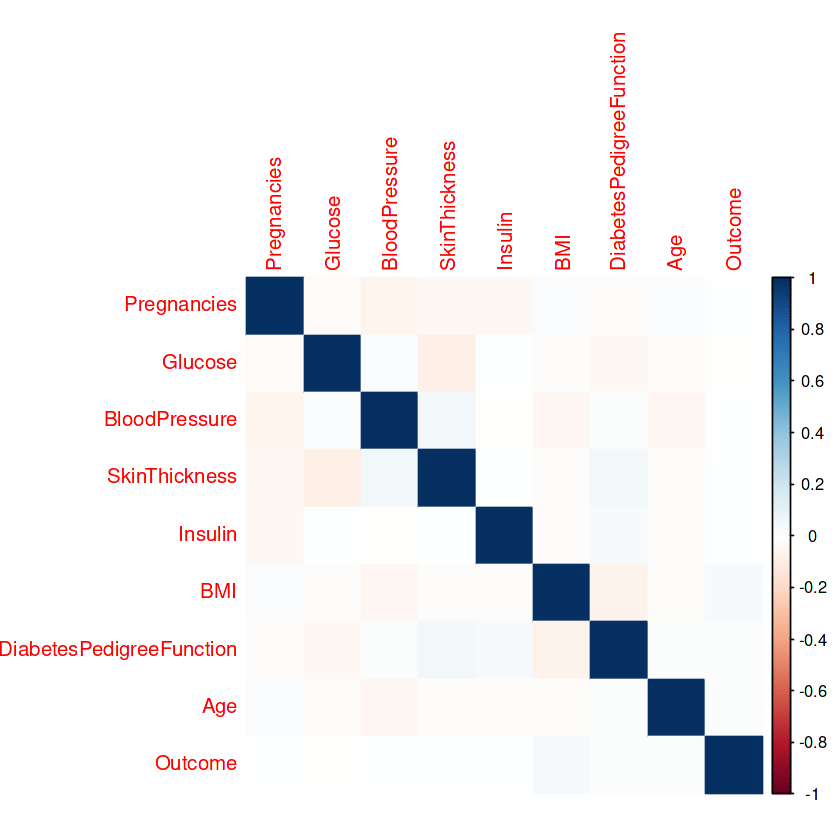

In [41]:
correlation_matrix <- cor(data[, c(colnames(data))])

print(correlation_matrix)
library(corrplot)
corrplot(correlation_matrix, method = "color")


                           Pregnancies      Glucose BloodPressure SkinThickness
Pregnancies               1.0000000000 -0.022664911   -0.05230612 -1.691720e-02
Glucose                  -0.0226649108  1.000000000    0.02821464 -6.598603e-02
BloodPressure            -0.0523061174  0.028214636    1.00000000  5.214940e-02
SkinThickness            -0.0169171961 -0.065986031    0.05214940  1.000000e+00
Insulin                  -0.0367493297 -0.001818342    0.01208196 -8.229246e-05
BMI                       0.0232208886 -0.017762263   -0.04578108 -8.751012e-03
DiabetesPedigreeFunction -0.0142567920 -0.032230340    0.01787445  4.539683e-02
Age                       0.0228859070 -0.025652471   -0.04500400 -2.045404e-02
Outcome                   0.0008264635 -0.003550935    0.00949984 -2.243800e-02
                               Insulin          BMI DiabetesPedigreeFunction
Pregnancies              -3.674933e-02  0.023220889             -0.014256792
Glucose                  -1.818342e-03 -0.0177

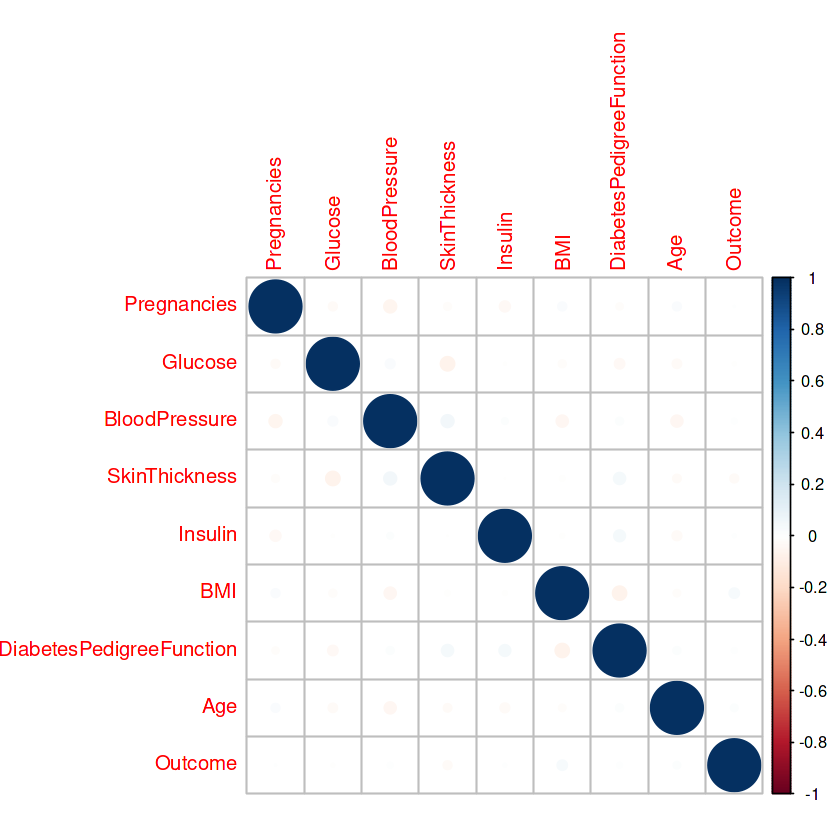

In [42]:
correlation_matrix_spearman <-  cor(data[, c(colnames(data))], method = "spearman")

# Print spearman correlation matrix
print(correlation_matrix_spearman)

# Visualize the spearman correlation matrix
library(corrplot)
corrplot(correlation_matrix_spearman)